In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import pandas.testing as tm

In [2]:
df = pd.read_csv(r'D:\Masters\DMML\Project\Datasets\cars.csv', encoding="ISO-8859-1")

C:\Users\srija\AppData\Local\Temp\ipykernel_15608\2895427625.py:1: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\Masters\DMML\Project\Datasets\cars.csv', encoding="ISO-8859-1")


In [3]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:35.46558+00,2017-03-16 18:57:35.46558+00,1295.34
3552908,skoda,felicia,NaN,2000.0,NaN,50.0,other,NaN,NaN,NaN,NaN,NaN,electric,2017-03-16 18:57:37.761349+00,2017-03-16 18:57:37.761349+00,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:40.435847+00,2017-03-16 18:57:40.435847+00,1295.34
3552910,skoda,fabia,NaN,2001.0,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:43.595523+00,2017-03-16 18:57:43.595523+00,1295.34


In [4]:
df.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type               object
color_slug              object
stk_year                object
transmission            object
door_count              object
seat_count              object
fuel_type               object
date_created            object
date_last_seen          object
price_eur              float64
dtype: object

In [5]:
df.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [6]:
df.drop('date_created',axis=1,inplace = True)
df.drop('date_last_seen',axis=1,inplace = True)
df.drop('stk_year',axis=1,inplace = True)
df.drop('color_slug',axis=1,inplace = True)

In [7]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,man,5,7,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,man,5,5,diesel,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,man,5,5,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,man,5,5,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,man,5,5,gasoline,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,NaN,NaN,NaN,NaN,1295.34
3552908,skoda,felicia,NaN,2000.0,NaN,50.0,other,NaN,NaN,NaN,electric,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,NaN,NaN,NaN,NaN,1295.34
3552910,skoda,fabia,NaN,2001.0,NaN,NaN,other,NaN,NaN,NaN,NaN,1295.34


In [8]:
df['mileage'].value_counts()

0.0         162393
10.0        107072
1.0          34690
100.0        25844
5.0          21051
             ...  
218284.0         1
358975.0         1
156596.0         1
189986.0         1
297431.0         1
Name: mileage, Length: 248142, dtype: int64

In [9]:
#Checking for null values and filling the data

In [10]:
categorical_columns = []
continous_columns = []
discrete_columns = []

for x in df.columns:
  if df[x].dtypes == 'O':
    categorical_columns.append(x)
  else:
    if df[x].nunique()>20:
      continous_columns.append(x)
    else:
      discrete_columns.append(x)

In [11]:
categorical_columns

['maker',
 'model',
 'body_type',
 'transmission',
 'door_count',
 'seat_count',
 'fuel_type']

In [12]:
continous_columns

['mileage',
 'manufacture_year',
 'engine_displacement',
 'engine_power',
 'price_eur']

In [13]:
discrete_columns

[]

In [14]:
for x in continous_columns:
  df[x].fillna(df[x].median(),inplace=True)

In [15]:
for x in categorical_columns:
  df[x].fillna(df[x].mode()[0],inplace=True)

In [16]:
df.isna().sum()

maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
body_type              0
transmission           0
door_count             0
seat_count             0
fuel_type              0
price_eur              0
dtype: int64

In [17]:
#All the null values were removed 

In [18]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,5,7,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5,5,diesel,8882.31
2,bmw,octavia,97676.0,2010.0,1995.0,85.0,other,man,5,5,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,man,5.0,5.0,gasoline,1295.34
3552908,skoda,felicia,86415.0,2000.0,1798.0,50.0,other,man,5.0,5.0,electric,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,man,5.0,5.0,gasoline,1295.34
3552910,skoda,fabia,86415.0,2001.0,1798.0,86.0,other,man,5.0,5.0,gasoline,1295.34


In [19]:
df.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type               object
transmission            object
door_count              object
seat_count              object
fuel_type               object
price_eur              float64
dtype: object

In [20]:
#dtype={'mileage': int} 

In [21]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.552912e+06,3.552912e+06,3.552912e+06,3.552912e+06,3.552912e+06
mean,1.128138e+05,2.001719e+03,1.992493e+03,9.652077e+01,1.625812e+06
std,3.244392e+05,7.738632e+01,1.758184e+03,4.530516e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,2.350475e+04,2.005000e+03,1.560000e+03,7.400000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.497900e+05,2.013000e+03,1.991000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


In [22]:
#Now we should remove the outliers

array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'manufacture_year'}>],
       [<AxesSubplot:title={'center':'engine_displacement'}>,
        <AxesSubplot:title={'center':'engine_power'}>],
       [<AxesSubplot:title={'center':'price_eur'}>, <AxesSubplot:>]],
      dtype=object)

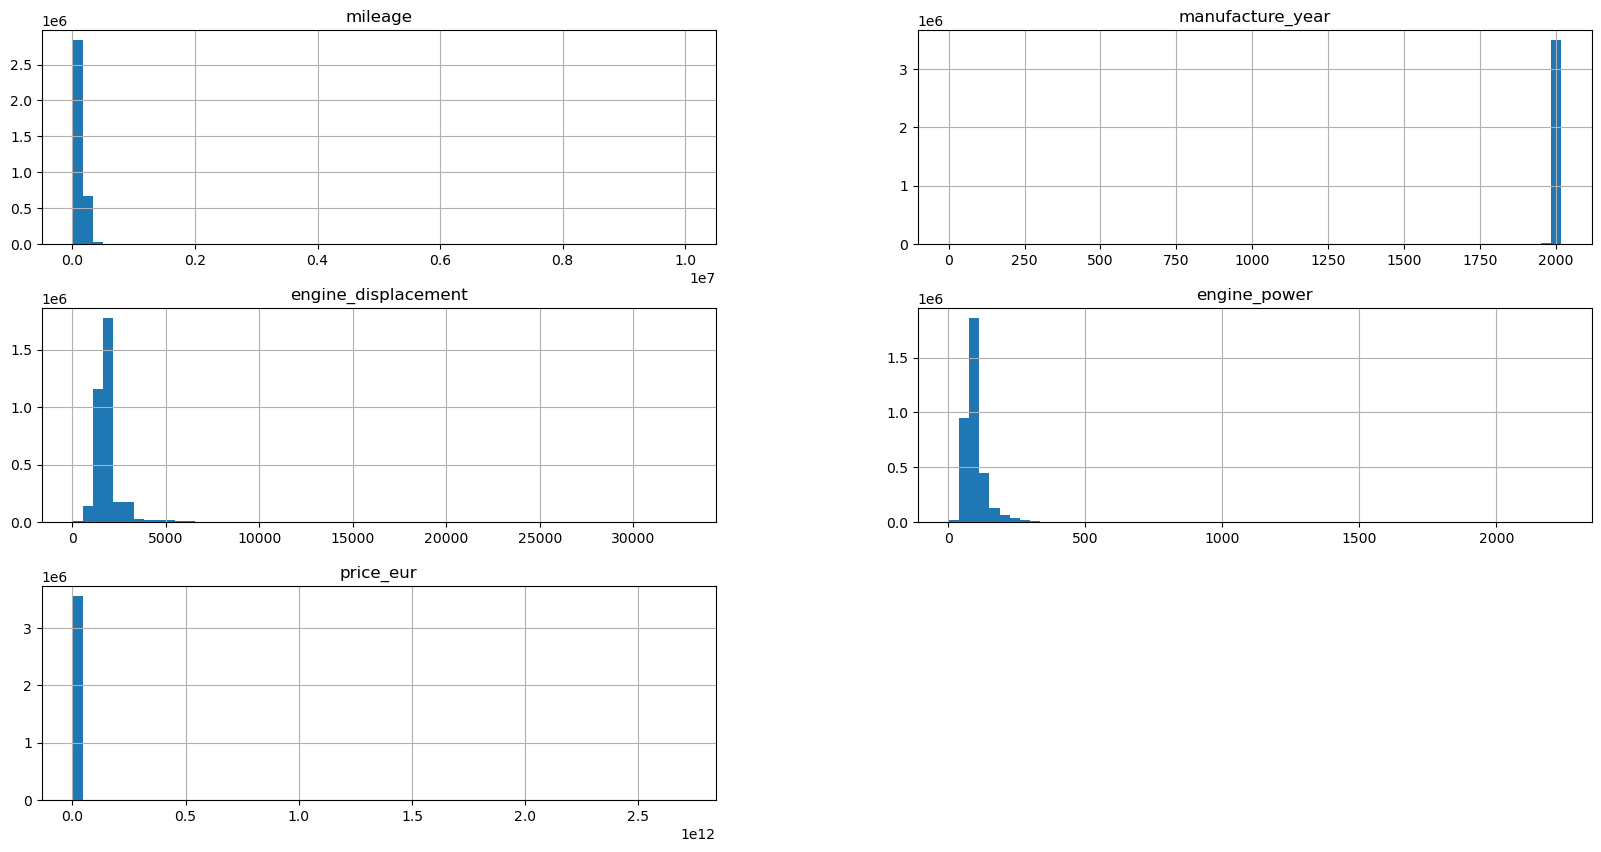

In [23]:
df.hist(bins=60,figsize=(20,10))

In [24]:
df[df.mileage>300000]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
9,skoda,octavia,301381.0,2002.0,1900.0,88.0,other,man,5,5,diesel,1332.35
17,opel,astra,316054.0,2005.0,1700.0,74.0,other,man,5,5,diesel,2331.61
137,ford,mondeo,302711.0,2003.0,2000.0,96.0,other,man,5,5,diesel,2590.67
153,skoda,octavia,327134.0,2006.0,2000.0,103.0,other,auto,5,5,diesel,6254.63
164,skoda,octavia,305000.0,2000.0,1893.0,85.0,other,man,3,5,diesel,1813.47
...,...,...,...,...,...,...,...,...,...,...,...,...
3552780,skoda,octavia,320000.0,2005.0,1900.0,77.0,other,man,5.0,5.0,gasoline,1295.34
3552798,skoda,octavia,308000.0,2006.0,1798.0,86.0,other,man,5.0,5.0,gasoline,1295.34
3552841,skoda,superb,375000.0,2008.0,2000.0,103.0,other,man,5.0,5.0,electric,1295.34
3552886,skoda,octavia,312000.0,2007.0,2000.0,103.0,other,man,5.0,5.0,gasoline,1295.34


In [27]:
df[df.mileage<1000]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
67,toyota,auris,5.0,2015.0,1598.0,97.0,other,man,5,5,gasoline,14985.20
68,toyota,aygo,5.0,2015.0,998.0,51.0,other,man,5,4,gasoline,8878.57
121,skoda,octavia,7.0,2015.0,1200.0,54.0,other,man,5,5,gasoline,11658.03
122,skoda,octavia,7.0,2015.0,1100.0,54.0,other,man,5,5,gasoline,9252.41
123,skoda,octavia,6.0,2015.0,1100.0,54.0,other,man,5,5,gasoline,8882.31
...,...,...,...,...,...,...,...,...,...,...,...,...
3552848,skoda,fabia,100.0,2002.0,1798.0,40.0,other,man,5.0,5.0,gasoline,1295.34
3552850,skoda,octavia,200.0,2007.0,1968.0,103.0,other,man,5.0,5.0,diesel,1295.34
3552881,skoda,fabia,0.0,2006.0,1798.0,86.0,other,man,5.0,5.0,gasoline,1295.34
3552890,skoda,octavia,0.0,2003.0,1900.0,74.0,other,auto,5.0,5.0,electric,1295.34


In [28]:
df.drop(df[df['mileage'] > 300000].index, inplace = True)

In [29]:
df.drop(df[df['mileage'] < 1000].index, inplace = True)

In [30]:
df[df.mileage>300000]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [31]:
df[df.mileage<300]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [32]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,5,7,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5,5,diesel,8882.31
2,bmw,octavia,97676.0,2010.0,1995.0,85.0,other,man,5,5,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,man,5.0,5.0,gasoline,1295.34
3552908,skoda,felicia,86415.0,2000.0,1798.0,50.0,other,man,5.0,5.0,electric,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,man,5.0,5.0,gasoline,1295.34
3552910,skoda,fabia,86415.0,2001.0,1798.0,86.0,other,man,5.0,5.0,gasoline,1295.34


In [33]:
df[df.manufacture_year>2018]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [34]:
df[df.manufacture_year<1980]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
9984,skoda,octavia,86415.0,1480.0,1600.0,77.0,compact,man,None,None,gasoline,6624.72
9992,citroen,c3,86415.0,1377.0,1400.0,50.0,compact,man,None,None,diesel,6254.63
10035,skoda,octavia,140700.0,1955.0,15100.0,86.0,compact,man,None,None,gasoline,4811.25
10061,skoda,octavia,135000.0,1796.0,1796.0,120.0,compact,auto,None,None,gasoline,4034.05
10071,skoda,octavia,86415.0,1354.0,1798.0,77.0,compact,man,None,None,gasoline,2957.07
...,...,...,...,...,...,...,...,...,...,...,...,...
3552818,skoda,superb,160000.0,1600.0,2000.0,125.0,other,man,5.0,5.0,electric,1295.34
3552832,skoda,superb,173000.0,1730.0,2000.0,125.0,other,man,5.0,5.0,electric,1295.34
3552835,skoda,fabia,175000.0,1750.0,1798.0,86.0,other,man,5.0,5.0,gasoline,1295.34
3552837,skoda,fabia,245418.0,1886.0,1886.0,47.0,other,man,5.0,5.0,diesel,1295.34


In [35]:
df.drop(df[df['manufacture_year'] < 1980].index, inplace = True)

In [36]:
df[df.manufacture_year>2017]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [37]:
df[df.manufacture_year<1980]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [38]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,5,7,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5,5,diesel,8882.31
2,bmw,octavia,97676.0,2010.0,1995.0,85.0,other,man,5,5,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,man,5.0,5.0,gasoline,1295.34
3552908,skoda,felicia,86415.0,2000.0,1798.0,50.0,other,man,5.0,5.0,electric,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,man,5.0,5.0,gasoline,1295.34
3552910,skoda,fabia,86415.0,2001.0,1798.0,86.0,other,man,5.0,5.0,gasoline,1295.34


In [39]:
df[df.engine_displacement<20]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
6783,skoda,octavia,115000.0,2007.0,16.0,77.0,other,man,None,7,gasoline,2960.73
7340,ford,c-max,133000.0,2003.0,18.0,88.0,other,man,None,None,gasoline,2775.68
42483,skoda,octavia,200001.0,1996.0,1.0,110.0,compact,man,None,None,gasoline,3367.88
57501,skoda,octavia,86415.0,1986.0,10.0,86.0,compact,man,None,None,gasoline,184.68
70377,bmw,octavia,208000.0,1998.0,18.0,87.0,other,man,4,None,gasoline,2220.54
...,...,...,...,...,...,...,...,...,...,...,...,...
3537769,skoda,fabia,86415.0,2007.0,10.0,86.0,other,man,5.0,5.0,electric,1295.34
3539679,skoda,octavia,83420.0,2013.0,15.0,77.0,coupe,man,5.0,5.0,diesel,1295.34
3541801,renault,captur,21300.0,2014.0,14.0,86.0,other,auto,5.0,5.0,gasoline,1295.34
3545555,alfa-romeo,146,165000.0,1998.0,14.0,74.0,other,man,5.0,5.0,gasoline,1295.34


In [40]:
df[df.engine_displacement>4000]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
46,audi,a8,4000.0,2014.0,4134.0,317.0,other,auto,4,4,diesel,98692.30
245,bmw,octavia,119000.0,2004.0,4398.0,245.0,other,auto,2,4,gasoline,14766.84
453,mercedes-benz,octavia,56000.0,2014.0,6208.0,86.0,other,auto,2,4,gasoline,46595.11
471,ford,mustang,9200.0,2015.0,5000.0,324.0,other,auto,None,None,gasoline,44781.64
508,mercedes-benz,octavia,54000.0,2010.0,4663.0,320.0,other,auto,2,4,gasoline,58216.14
...,...,...,...,...,...,...,...,...,...,...,...,...
3552421,skoda,fabia,106164.0,2004.0,5560.0,55.0,other,man,5.0,5.0,gasoline,1295.34
3552422,skoda,fabia,116720.0,2002.0,5560.0,55.0,other,man,5.0,5.0,gasoline,1295.34
3552423,volkswagen,lupo,134000.0,2002.0,12200.0,37.0,other,man,5.0,5.0,gasoline,1295.34
3552433,skoda,fabia,166000.0,2001.0,5560.0,55.0,other,man,5.0,5.0,gasoline,1295.34


In [41]:
df.drop(df[df['engine_displacement'] >4000].index, inplace = True)

In [42]:
df.drop(df[df['engine_displacement'] < 20 ].index, inplace = True)

In [43]:
df[df.engine_displacement<20]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [44]:
df[df.engine_displacement>4000]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [45]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,5,7,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5,5,diesel,8882.31
2,bmw,octavia,97676.0,2010.0,1995.0,85.0,other,man,5,5,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,man,5.0,5.0,gasoline,1295.34
3552908,skoda,felicia,86415.0,2000.0,1798.0,50.0,other,man,5.0,5.0,electric,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,man,5.0,5.0,gasoline,1295.34
3552910,skoda,fabia,86415.0,2001.0,1798.0,86.0,other,man,5.0,5.0,gasoline,1295.34


In [46]:
df[df.engine_power>300]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
1102,bmw,m3,9800.0,2014.0,2979.0,317.0,other,man,None,5,gasoline,67727.61
1106,audi,s8,45040.0,2013.0,3993.0,382.0,other,man,None,5,gasoline,73649.15
1541,mercedes-benz,octavia,1400.0,2009.0,3982.0,375.0,other,auto,2,2,gasoline,142487.05
2870,nissan,gt-r,67295.0,2011.0,3799.0,390.0,other,auto,2,5,gasoline,69948.11
3953,skoda,octavia,151000.0,2010.0,74.0,896.0,other,man,5,5,diesel,5736.49
...,...,...,...,...,...,...,...,...,...,...,...,...
3544679,mercedes-benz,octavia,5000.0,2016.0,3982.0,375.0,coupe,auto,2.0,2.0,gasoline,1295.34
3548309,renault,thalia,130165.0,2001.0,55.0,390.0,sedan,man,0.0,5.0,gasoline,1295.34
3548810,skoda,octavia,3000.0,2016.0,1798.0,340.0,other,man,5.0,0.0,diesel,1295.34
3551153,audi,200,60000.0,2009.0,1798.0,309.0,other,man,5.0,5.0,gasoline,1295.34


In [47]:
df[df.engine_power<20]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
10879,skoda,octavia,86415.0,2009.0,1798.0,11.0,compact,man,None,None,gasoline,8105.11
16699,skoda,octavia,189000.0,2000.0,1811.0,11.0,compact,man,None,None,gasoline,2516.65
23166,skoda,fabia,86415.0,2009.0,1416.0,16.0,compact,man,None,None,gasoline,1739.45
28865,skoda,octavia,86415.0,2005.0,700.0,14.0,compact,auto,None,None,diesel,11065.88
30875,fiat,500,150000.0,2009.0,2800.0,10.0,compact,man,None,None,gasoline,9437.45
...,...,...,...,...,...,...,...,...,...,...,...,...
3538137,skoda,octavia,2689.0,1994.0,1798.0,15.0,other,man,5.0,1.0,diesel,1295.34
3538590,skoda,superb,59807.0,2013.0,1968.0,12.0,stationwagon,man,0.0,0.0,diesel,1295.34
3539201,skoda,superb,59807.0,2013.0,1968.0,12.0,stationwagon,auto,5.0,5.0,diesel,1295.34
3541844,honda,cr-v,223000.0,2006.0,2204.0,3.0,other,man,5.0,5.0,diesel,1295.34


In [48]:
df.drop(df[df['engine_power'] >300].index, inplace = True)

In [49]:
df.drop(df[df['engine_power'] <20].index, inplace = True)

In [50]:
df[df.engine_power>300]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [51]:
df[df.engine_power<20]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [52]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,5,7,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5,5,diesel,8882.31
2,bmw,octavia,97676.0,2010.0,1995.0,85.0,other,man,5,5,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,man,5.0,5.0,gasoline,1295.34
3552908,skoda,felicia,86415.0,2000.0,1798.0,50.0,other,man,5.0,5.0,electric,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,man,5.0,5.0,gasoline,1295.34
3552910,skoda,fabia,86415.0,2001.0,1798.0,86.0,other,man,5.0,5.0,gasoline,1295.34


In [53]:
df[df.price_eur>50000]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
310,audi,a6,44353.0,2013.0,2967.0,230.0,other,auto,5,5,diesel,51776.46
472,mercedes-benz,octavia,13280.0,2015.0,2987.0,190.0,other,man,None,None,diesel,89115.47
535,skoda,octavia,10000.0,2015.0,2967.0,193.0,other,auto,5,5,diesel,64729.83
846,bmw,x5,18500.0,2014.0,2993.0,190.0,other,auto,5,5,diesel,61065.88
1004,mercedes-benz,octavia,7390.0,2015.0,2987.0,190.0,other,auto,5,5,diesel,82346.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2878543,skoda,fabia,74401.0,2008.0,1390.0,63.0,other,man,5.0,4.0,gasoline,66724.65
2878544,skoda,octavia,84598.0,2013.0,1598.0,77.0,other,man,5.0,5.0,gasoline,66724.65
2878545,volkswagen,golf,181000.0,2004.0,1968.0,103.0,other,man,5.0,5.0,gasoline,66724.65
2883212,mercedes-benz,octavia,47000.0,2015.0,2987.0,185.0,other,auto,5.0,5.0,gasoline,51776.46


In [54]:
df[df.price_eur<900]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
10,skoda,octavia,202136.0,2002.0,1400.0,55.0,other,man,5,5,gasoline,740.19
13,skoda,favorit,41250.0,1990.0,1300.0,44.0,other,man,5,5,gasoline,370.10
23,ford,fiesta,84476.0,1997.0,1300.0,44.0,other,man,5,5,gasoline,740.19
64,ford,galaxy,263000.0,1998.0,1998.0,85.0,other,man,5,7,gasoline,740.19
103,skoda,octavia,297647.0,1992.0,1400.0,40.0,other,man,3,5,gasoline,629.16
...,...,...,...,...,...,...,...,...,...,...,...,...
2883974,skoda,octavia,73500.0,2010.0,1390.0,90.0,other,man,5.0,5.0,gasoline,444.12
2883975,volkswagen,sharan,275000.0,2000.0,1896.0,85.0,other,man,5.0,7.0,gasoline,444.12
2883976,ford,focus,191136.0,2004.0,1596.0,74.0,other,man,5.0,5.0,gasoline,444.12
2883977,dodge,srt-4,86415.0,2005.0,2429.0,170.0,other,man,4.0,5.0,gasoline,444.12


In [55]:
df.drop(df[df['price_eur'] >50000].index, inplace = True)

In [56]:
df.drop(df[df['price_eur'] <900].index, inplace = True)

In [57]:
df[df.price_eur>50000]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [58]:
df[df.price_eur<900]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur


In [59]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,5,7,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5,5,diesel,8882.31
2,bmw,octavia,97676.0,2010.0,1995.0,85.0,other,man,5,5,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5,5,gasoline,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,man,5.0,5.0,gasoline,1295.34
3552908,skoda,felicia,86415.0,2000.0,1798.0,50.0,other,man,5.0,5.0,electric,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,man,5.0,5.0,gasoline,1295.34
3552910,skoda,fabia,86415.0,2001.0,1798.0,86.0,other,man,5.0,5.0,gasoline,1295.34


array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'manufacture_year'}>],
       [<AxesSubplot:title={'center':'engine_displacement'}>,
        <AxesSubplot:title={'center':'engine_power'}>],
       [<AxesSubplot:title={'center':'price_eur'}>, <AxesSubplot:>]],
      dtype=object)

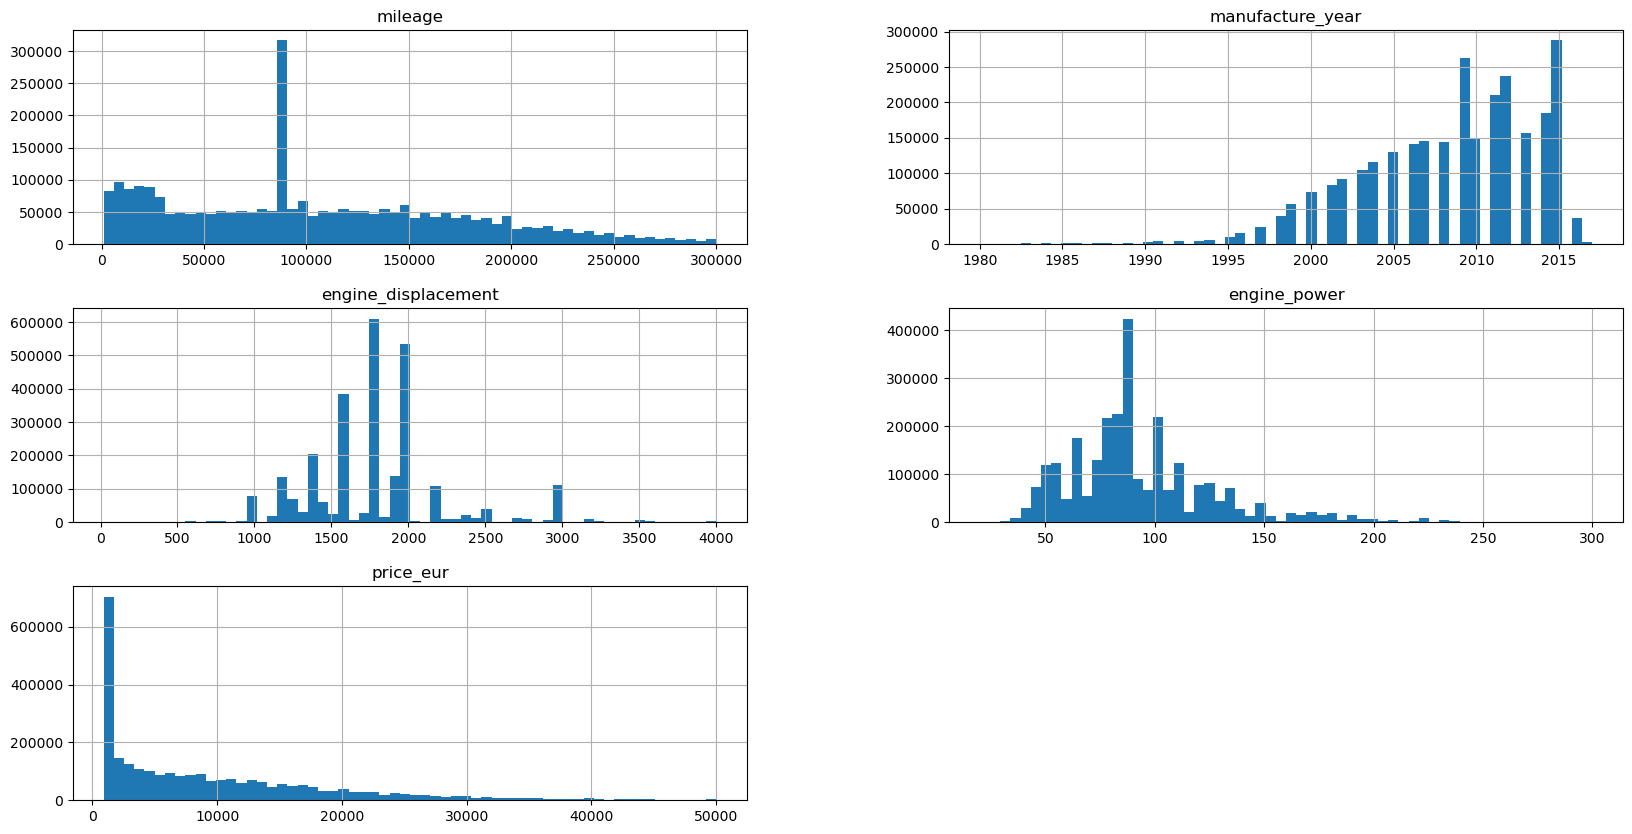

In [60]:
df.hist(bins=60,figsize=(20,10))

In [61]:
df.to_csv(r'D:\Masters\DMML\Project\Datasets\Europe cleaned.csv', index = False)